# Task # 2 - To Explore Supervised Machine Learning

####  In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
#### This is a simple linear regression task as it involves just two variables. 

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data
### Let's start to read CSV file of our dateset into a pandas dataframe.

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploratory Data Analysis (EDA)

In [15]:
#to check number of rows and columns in dataframe ( [rows,columns] )
data.shape

(25, 2)

In [16]:
#check columns name
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [17]:
#Display the data types of each column using the attribute dtype
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [19]:
#check data type of each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [20]:
#check null values are present in dataset or not
data.isnull().head()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


**I use .isnull() function to find null values in data frame
here, True = Null  and False = Not Null
but is is hard to read to dataset which having large entries**

In [21]:
data.isnull().summ()

Hours     0
Scores    0
dtype: int64

**Here, we use previous .isnull() function but here we use sum() function also it add all Null values count and return their sum.**

## Visualizing data using different plots

Text(0, 0.5, 'Percentage Score')

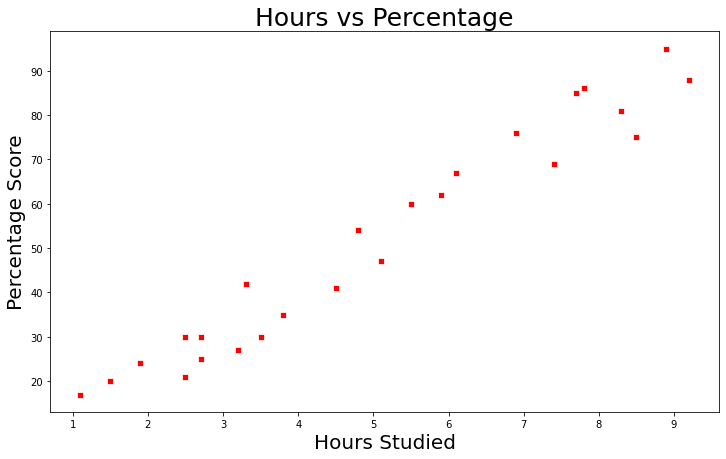

In [14]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=data['Hours'],y=data['Scores'],marker='s',color='red')
plt.title('Hours vs Percentage',fontdict={'fontsize':25})  
plt.xlabel('Hours Studied',fontdict={'fontsize':20})  
plt.ylabel('Percentage Score',fontdict={'fontsize':20})  

**From the graph above, we can clearly see that if we studied more hours your percentage score is improve**

Text(0, 0.5, 'Percentage Score')

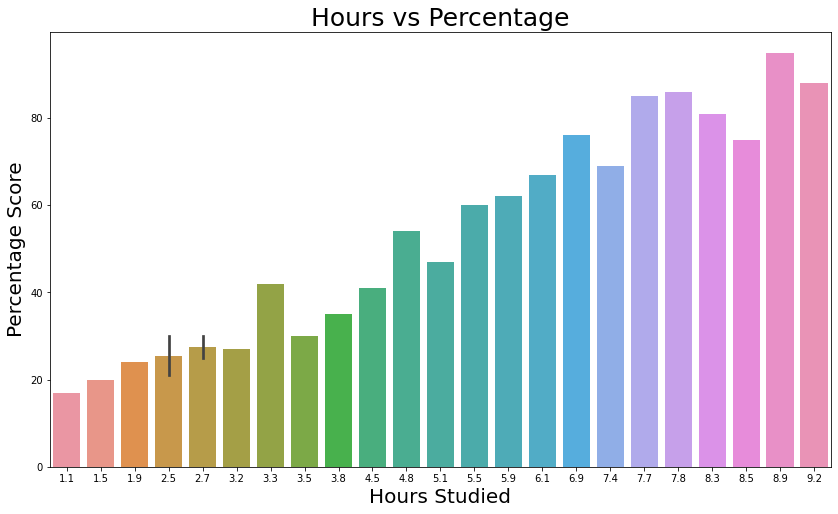

In [27]:
plt.figure(figsize=(14,8))
sns.barplot(x=data['Hours'],y=data['Scores'])
plt.title('Hours vs Percentage',fontdict={'fontsize':25})  
plt.xlabel('Hours Studied',fontdict={'fontsize':20})  
plt.ylabel('Percentage Score',fontdict={'fontsize':20})  

## Building a Supervised Machine Learning model

### Train Test Split

**Spliting data for Training and Testing where 'x' training data and 'y' is testing data**

In [42]:
X=data[['Hours']]
Y=data['Scores']

In [43]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0) 

### Training and Predicting

**We have split our data into training and testing sets, and now is finally the time to train our algorithm.**

In [51]:
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Regration Plot for the test data**

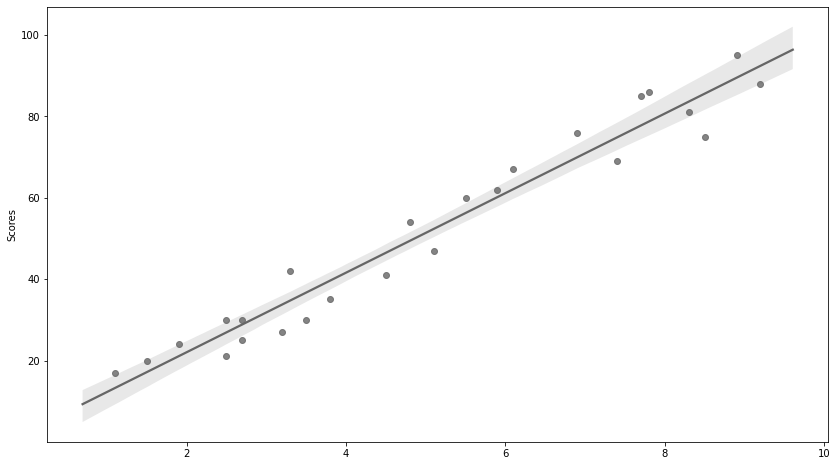

In [50]:
plt.figure(figsize=(14,8))
sns.regplot(X,Y,color='#666666')

**Now that we have trained our algorithm, it's time to make some predictions**

In [52]:
y_prd = model.predict(X_test)

In [59]:
acc=metrics.mean_absolute_error(y_test,y_prd)
print("Accuracy is : {:.3f}".format(acc))

Accuracy is : 4.184


# What will be predicted score if a student study for 9.25 hrs in a day?

In [75]:
hours = 9.25
hr=np.reshape(hours,(-1,1))
own_pred = model.predict(hr)
print("No of Hours = {}".format(hours))
print("Predicted Score = {:.2f} %".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69 %


## You can also test with your own data

In [72]:
hours = float(input("How many Hours you studied : "))
hr=np.reshape(hours,(-1,1))
own_pred = model.predict(hr)
print("No of Hours = {}".format(hours))
print("Predicted Score = {:.2f} %".format(own_pred[0]))

How many Hours you studied : 9.5
No of Hours = 9.5
Predicted Score = 96.17 %


#  - End